In [2]:
import pandas as pd

In [3]:
df = pd.read_excel("data/my_data.xlsx")

In [4]:
from arml import unit_root_test, plot_PACF_ACF

In [5]:
unit_root_test(df["electricity"], method="ADF")

ADF p-value: 0.000000 and data is stationary at 5% significance level


(1.5469596472188275e-29, None)

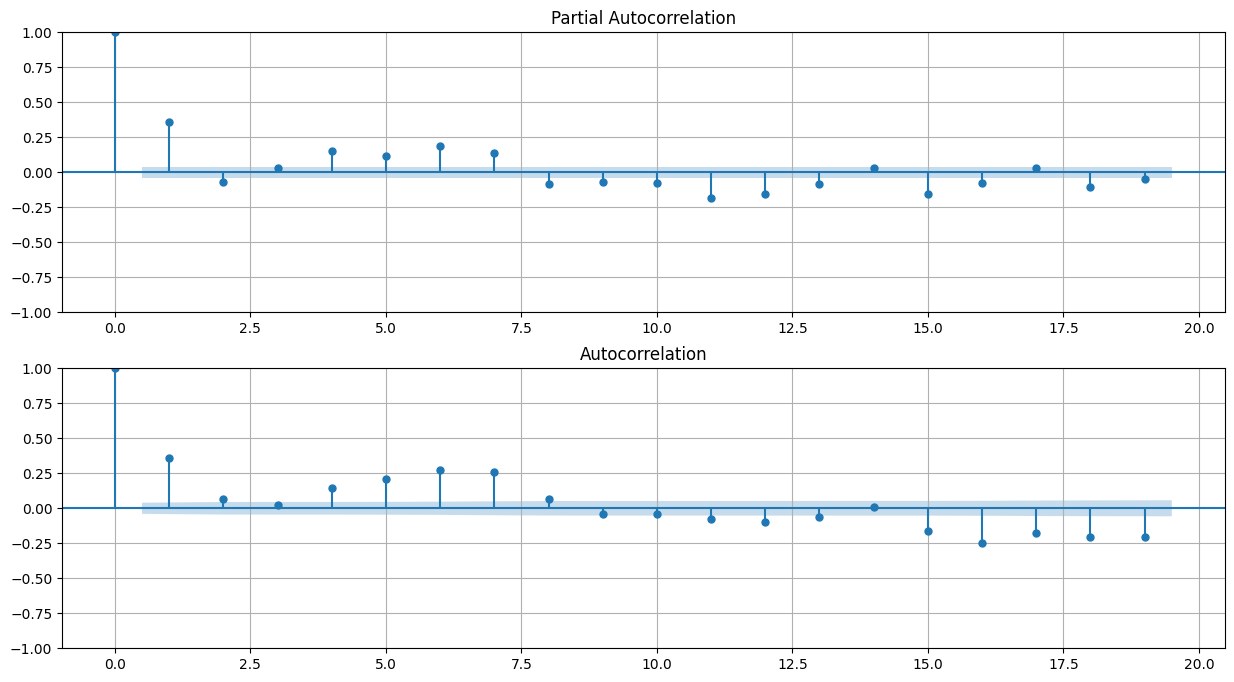

In [6]:
plot_PACF_ACF(df["electricity"], lag_num=19)